In [ ]:
import numpy as np
import cv2

In [ ]:
#to read the input image
img = cv2.imread('/content/drive/MyDrive/opencvdnn/image_2.jpg')

#scale is for data normalisation
Height = img.shape[0]
Width = img.shape[1]
scale = 0.00392 #1/255

#read the classes
classes = None
with open('/content/drive/MyDrive/opencvdnn/yolov3.txt','r') as f:
  classes = [line.strip() for line in f.readlines()]

#diff color for diff classes
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

#read pre trained model and config file
net = cv2.dnn.readNet('/content/drive/MyDrive/opencvdnn/yolov3.weights', '/content/drive/MyDrive/opencvdnn/yolov3.cfg')

#create input blob (img,scale,(size,size),(r,g,b--mean value substraction), swaprb,crop)
blob = cv2.dnn.blobFromImage(img, scale, (416,416), (0,0,0), True, crop=False)

#set input blob for the network
net.setInput(blob)

In [ ]:
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)
    #                                                          fontsize     thickness        
    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [ ]:
def get_output_layers(net):
    
    #give names of all layer
    layer_names = net.getLayerNames()
    #outputlayer
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers

In [ ]:
# run inference through the network and gather predictions from output layers
outs = net.forward(get_output_layers(net))

In [ ]:
# initialization
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

In [ ]:
#Non-Max Suppression 
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    
    draw_bounding_box(img, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))



In [ ]:
from google.colab.patches import cv2_imshow

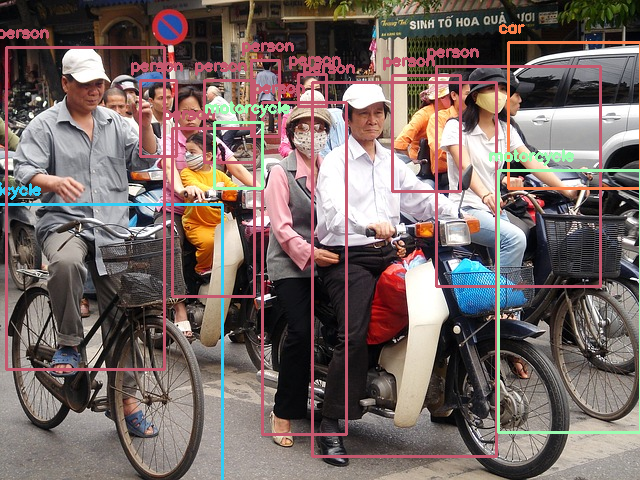

In [ ]:
cv2_imshow(img)
cv2.waitKey()
cv2.imwrite('object-detection.jpg', img)
cv2.destroyAllWindows()